In [51]:
#import libraies 


#在Python中，pandas是基于NumPy数组构建的，使数据预处理、清洗、分析工作变得更快更简单。
#pandas是专门为处理表格和混杂数据设计的，而NumPy更适合处理统一的数值数组数据。

#There are two kinds of magics, line-oriented and cell-oriented. 
#可以内嵌绘图
#they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. 
#Lines magics can return results and can be used in the right hand side of an assignment. 
#Cell magics are prefixed with a double %%, 
#单元型magic函数是由两个“%%”做前缀的，它的参数不仅是当前“%%”行后面的内容，也包括了在当前行以下的行。



import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Users\y1nso\Downloads\movies2.csv')


In [52]:
# take a look at data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [53]:
# Missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [54]:
#check data type

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [60]:
# change data type of columns -- budget,gross  
# ValueError: Cannot convert non-finite values (NA or inf) to integer
# col is NULL so can't be transfer to int 

df['budget'] = df['budget'].fillna(0).astype('int64')

df['gross'] = df['gross'].fillna(0).astype('int64')

df['votes'] = df['votes'].fillna(0).astype('int64')


In [61]:
df.head()

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score    votes         director  \
0        June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000     Harold Ramis   
...                                ...    ...      ...              ...   
7663  October 23, 2020 (United States)    3.1       18    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        0    James Randall   
7667   August 19, 2020 (United States)    5.7        7     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                        NaN     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      NaN  
7666          0                        NaN    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [62]:
#create correct year column
#relased column format differntly with the video 

import datetime 

df['correct_year'] = df['released'].astype(str).str[0:-16]
#df['correct_year'] = pd.to_datetime(df['released_1'],format='%m%d%Y')
#del df['released_1']
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score    votes         director  \
0        June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000     Harold Ramis   
...                                ...    ...      ...              ...   
7663  October 23, 2020 (United States)    3.1       18    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        0    James Randall   
7667   August 19, 2020 (United States)    5.7        7     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime      correct_year  
0      46998772               Warner Bros.    146.0     June 13, 1980  
1      58853106          Columbia Pictures    104.0      July 2, 1980  
2     538375067                  Lucasfilm    124.0     June 20, 1980  
3      83453539         Paramount Pictures     88.0      July 2, 1980  
4      39846344             Orion Pictures     98.0     July 25, 1980  
...         ...                        ...      ...               ...  
7663          0                        NaN     90.0  October 23, 2020  
7664          0  Cactus Blue Entertainment     90.0  February 7, 2020  
7665          0           Embi Productions      NaN         April 27,  
7666          0                        NaN    120.0   October 1, 2020  
7667          0                PK 65 Films    102.0   August 19, 2020  

[7668 rows x 16 columns]

In [73]:
df = df.sort_values(by=['gross'],inplace=False, ascending =False)

In [65]:
#Look at all data, not partially 

pd.set_option('display.max_rows',None)

In [98]:
#drop any duplicates
#count distinct values 

#df['company'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates()
df.head()

name  rating  genre  year  released  score    votes  director  writer  \
5445   534       5      0  2009       696    7.8  1100000      1162    1788   
7445   536       5      0  2019       183    8.4   903000       167     754   
3045  6897       5      6  1997       704    7.8  1100000      1162    1788   
6663  5146       5      0  2015       698    7.8   876000      1130    2559   
7244   537       5      0  2018       192    8.4   897000       167     754   

      star  country     budget       gross  company  runtime  correct_year  
5445  2337       55  237000000  2847246203     2254    162.0           617  
7445  2244       55  356000000  2797501328     1606    181.0           161  
3045  1598       55  200000000  2201647264     2254    194.0           624  
6663   526       55  245000000  2069521700     1541    138.0           619  
7244  2244       55  321000000  2048359754     1606    149.0           170

In [99]:
df.head()

name  rating  genre  year  released  score    votes  director  writer  \
5445   534       5      0  2009       696    7.8  1100000      1162    1788   
7445   536       5      0  2019       183    8.4   903000       167     754   
3045  6897       5      6  1997       704    7.8  1100000      1162    1788   
6663  5146       5      0  2015       698    7.8   876000      1130    2559   
7244   537       5      0  2018       192    8.4   897000       167     754   

      star  country     budget       gross  company  runtime  correct_year  
5445  2337       55  237000000  2847246203     2254    162.0           617  
7445  2244       55  356000000  2797501328     1606    181.0           161  
3045  1598       55  200000000  2201647264     2254    194.0           624  
6663   526       55  245000000  2069521700     1541    138.0           619  
7244  2244       55  321000000  2048359754     1606    149.0           170

In [ ]:
#budget high correlation? 
#company high correlation? 


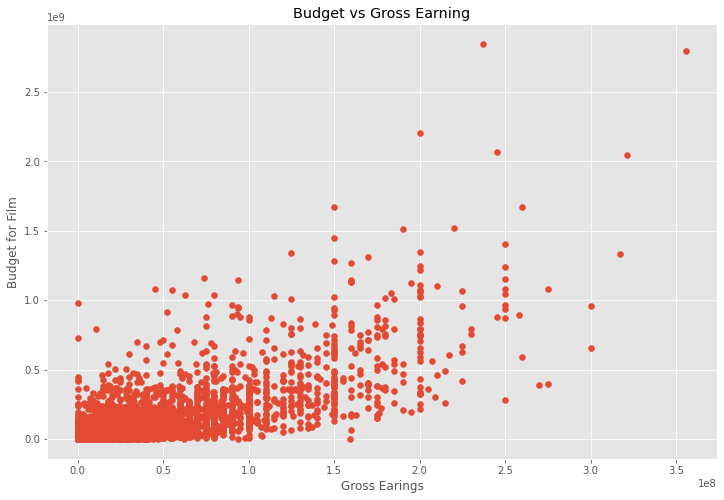

In [75]:
#Sactter plot with budegt vs gross 


plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earings')
plt.ylabel('Budget for Film')
plt.show()

In [74]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime       correct_year  
5445  2847246203  Twentieth Century Fox    162.0  December 18, 2009  
7445  2797501328         Marvel Studios    181.0     April 26, 2019  
3045  2201647264  Twentieth Century Fox    194.0  December 19, 1997  
6663  2069521700              Lucasfilm    138.0  December 18, 2015  
7244  2048359754         Marvel Studios    149.0     April 27, 2018

<AxesSubplot:xlabel='budget', ylabel='gross'>

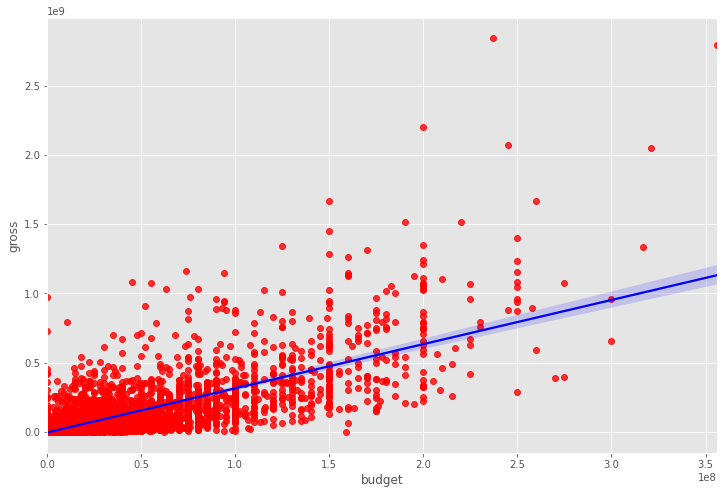

In [77]:
# Plot budget vs gross using seaborn - data visulization lib built on top of matplotlib 

sns.regplot(x='budget',y='gross',data =df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [ ]:
# let's look at correlation 

In [82]:
df.corr(method='pearson')

#only work for numeric data type 
#Pearson, kendall,spearman 


year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222427  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222427  0.409182  1.000000  0.486931  0.632870  0.309122
budget   0.309212  0.055665  0.486931  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632870  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309122  0.269510  0.245235  1.000000

In [ ]:
# Confirmed high correlation between budget and gross

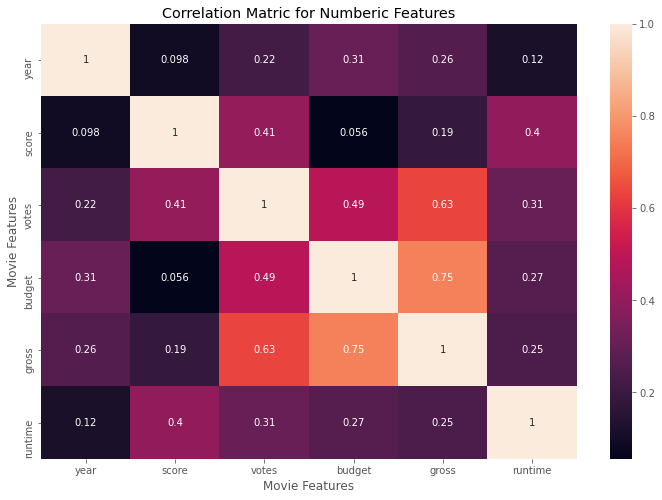

In [85]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matric for Numberic Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [87]:
# Look at company 

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime       correct_year  
5445  2847246203  Twentieth Century Fox    162.0  December 18, 2009  
7445  2797501328         Marvel Studios    181.0     April 26, 2019  
3045  2201647264  Twentieth Century Fox    194.0  December 19, 1997  
6663  2069521700              Lucasfilm    138.0  December 18, 2015  
7244  2048359754         Marvel Studios    149.0     April 27, 2018

In [91]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes 

df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
5445   534       5      0  2009       696    7.8  1100000      1162    1788   
7445   536       5      0  2019       183    8.4   903000       167     754   
3045  6897       5      6  1997       704    7.8  1100000      1162    1788   
6663  5146       5      0  2015       698    7.8   876000      1130    2559   
7244   537       5      0  2018       192    8.4   897000       167     754   
7480  6195       4      2  2019      1488    6.9   222000      1463    1929   
6653  2970       5      0  2015      1704    7.0   593000       525    3576   
6043  5503       5      0  2012      2472    8.0  1300000      1526    2326   
6646  2146       5      0  2015       221    7.1   370000      1196     717   
7494  2132       4      2  2019      2676    6.8   148000       440    1960   
6644   535       5      0  2015      2235    7.3   777000      1526    2326   
7247   793       5      0  2018       959    7.3   661000      2466    3806   
5845  2408       5      1  2011      1445    8.1   790000       684    4062   
7075  5147       5      0  2017       661    7.0   581000      2289    3526   
7271  2971       5      0  2018      1799    6.2   277000      1126    1100   
6262  2131       4      2  2013      2715    7.4   585000       440    1960   
7072   659       4      7  2017      2022    7.1   283000       256    4010   
7281  2761       4      2  2018      1729    7.6   263000       309     498   
7055  5834       5      0  2017        61    6.6   214000       840    1441   
6244  2824       5      0  2013      2449    7.1   779000      2548    1181   
6688  3624       4      2  2015      1395    6.4   218000      1645     541   
6846  1057       5      0  2016      2488    7.8   694000       167     754   
7250   475       5      0  2018       748    6.9   404000      1196     997   
4245  6222       5      0  2003       680    8.9  1700000      2198    1752   
7458  5086       5      0  2019      1501    7.5   359000      1471     715   
7456  1062       5      0  2019      2213    6.8   478000       152     263   
5878  6969       5      0  2011      1870    6.2   390000      1893    1244   
6059  4953       5      0  2012      2804    7.7   642000      2481    3132   
6494  6968       5      0  2014      1849    5.6   302000      1893    1244   
2448  6195       1      2  1994      1811    8.5   970000      2422    1709   
6047  5727       5      0  2012      1510    8.4  1600000       491    2276   
7463  5143       5      0  2019       731    6.5   394000      1130     725   
7450  2931       6      5  2019      3062    8.4  1000000      2772    4255   
7488  6950       1      2  2019      1787    7.7   217000      1518    2169   
5685  6949       1      2  2010      1752    8.2   776000      1685    2169   
4852  4259       5      0  2006      1645    7.3   668000      1008    4154   
6869  4617       5      0  2016       673    7.8   572000       922     728   
7481   291       4      1  2019      2394    6.9   239000      1041    2089   
5860  4262       5      0  2011      2350    6.6   492000      2348    4154   
7140  1553       4      2  2017      1896    6.3   119000      1645     769   
2245  2968       5      0  1993      1689    8.1   894000      2666    2938   
6908  1979       4      2  2016      1744    7.3   250000       130     229   
3451  5140       4      0  1999      2318    6.5   748000       973    1482   
5667   301       4      1  2010      2182    6.4   392000      2750    2616   
6863  7505       4      2  2016      2175    8.0   450000       368     583   
6045  6002       5      1  2012       651    7.8   773000      2198    1366   
3843  2413       4      1  2001      2593    7.6   685000       443    1748   
5243  5726       5      0  2008      1476    9.0  2400000       491    2276   
5652  2407       5      1  2010      2620    7.7   495000       684    4062   
6311  1552       4      2  2013      1599    7.3   37700

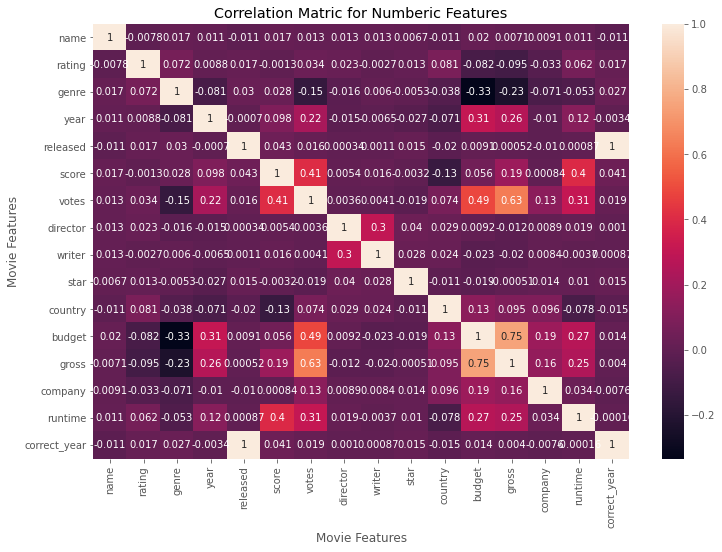

In [92]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matric for Numberic Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [93]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name          1.000000 -0.007816  0.016974  0.011371 -0.010843  0.017427   
rating       -0.007816  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre         0.016974  0.072423  1.000000 -0.081261  0.029822  0.027965   
year          0.011371  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released     -0.010843  0.016613  0.029822 -0.000695  1.000000  0.042788   
score         0.017427 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes         0.012871  0.033743 -0.145296  0.222427  0.015878  0.409182   
director      0.012970  0.022545 -0.016161 -0.015259  0.000337  0.005440   
writer        0.013230 -0.002721  0.005991 -0.006489  0.001054  0.016243   
star          0.006652  0.013316 -0.005311 -0.026969  0.015470 -0.003154   
country      -0.010753  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget        0.020201 -0.081939 -0.334021  0.309212  0.009145  0.055665   
gross         0.007100 -0.095450 -0.234297  0.261900  0.000519  0.186392   
company       0.009130 -0.033039 -0.071138 -0.010486 -0.010429  0.000842   
runtime       0.010855  0.062145 -0.052711  0.120811  0.000868  0.399451   
correct_year -0.011112  0.016809  0.027347 -0.003375  0.999346  0.040795   

                 votes  director    writer      star   country    budget  \
name          0.012871  0.012970  0.013230  0.006652 -0.010753  0.020201   
rating        0.033743  0.022545 -0.002721  0.013316  0.081244 -0.081939   
genre        -0.145296 -0.016161  0.005991 -0.005311 -0.037615 -0.334021   
year          0.222427 -0.015259 -0.006489 -0.026969 -0.070938  0.309212   
released      0.015878  0.000337  0.001054  0.015470 -0.020427  0.009145   
score         0.409182  0.005440  0.016243 -0.003154 -0.133348  0.055665   
votes         1.000000  0.003590  0.004121 -0.018647  0.073525  0.486931   
director      0.003590  1.000000  0.300412  0.039983  0.028725  0.009157   
writer        0.004121  0.300412  1.000000  0.027871  0.023581 -0.022641   
star         -0.018647  0.039983  0.027871  1.000000 -0.010825 -0.019002   
country       0.073525  0.028725  0.023581 -0.010825  1.000000  0.131720   
budget        0.486931  0.009157 -0.022641 -0.019002  0.131720  1.000000   
gross         0.632870 -0.011944 -0.019970 -0.000514  0.095325  0.750157   
company       0.133458  0.008932  0.008420  0.014128  0.095856  0.186512   
runtime       0.309122  0.018803 -0.003741  0.010448 -0.078412  0.269510   
correct_year  0.018518  0.001006  0.000869  0.015193 -0.014624  0.013995   

                 gross   company   runtime  correct_year  
name          0.007100  0.009130  0.010855     -0.011112  
rating       -0.095450 -0.033039  0.062145      0.016809  
genre        -0.234297 -0.071138 -0.052711      0.027347  
year          0.261900 -0.010486  0.120811     -0.003375  
released      0.000519 -0.010429  0.000868      0.999346  
score         0.186392  0.000842  0.399451      0.040795  
votes         0.632870  0.133458  0.309122      0.018518  
director     -0.011944  0.008932  0.018803      0.001006  
writer       -0.019970  0.008420 -0.003741      0.000869  
star         -0.000514  0.014128  0.010448      0.015193  
country       0.095325  0.095856 -0.078412     -0.014624  
budget        0.750157  0.186512  0.269510      0.013995  
gross         1.000000  0.156764  0.245235      0.003963  
company       0.156764  1.000000  0.034424     -0.007552  
runtime       0.245235  0.034424  1.000000     -0.000163  
correct_year  0.003963 -0.007552 -0.000163      1.000000

In [95]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs 

name          name            1.000000
              rating         -0.007816
              genre           0.016974
              year            0.011371
              released       -0.010843
              score           0.017427
              votes           0.012871
              director        0.012970
              writer          0.013230
              star            0.006652
              country        -0.010753
              budget          0.020201
              gross           0.007100
              company         0.009130
              runtime         0.010855
              correct_year   -0.011112
rating        name           -0.007816
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033743
              director        0.022545
              writer         -0.002721
              star       

In [96]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget        genre          -0.334021
genre         budget         -0.334021
              gross          -0.234297
gross         genre          -0.234297
genre         votes          -0.145296
votes         genre          -0.145296
score         country        -0.133348
country       score          -0.133348
rating        gross          -0.095450
gross         rating         -0.095450
budget        rating         -0.081939
rating        budget         -0.081939
genre         year           -0.081261
year          genre          -0.081261
runtime       country        -0.078412
country       runtime        -0.078412
genre         company        -0.071138
company       genre          -0.071138
country       year           -0.070938
year          country        -0.070938
runtime       genre          -0.052711
genre         runtime        -0.052711
              country        -0.037615
country       genre          -0.037615
company       rating         -0.033039
rating        company    

In [97]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]

high_corr

gross         votes           0.632870
votes         gross           0.632870
budget        gross           0.750157
gross         budget          0.750157
correct_year  released        0.999346
released      correct_year    0.999346
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings 
# company has low correlation 
